# **Using artificial neural networks to classify iris species**

Dataset: [Iris Species](https://www.kaggle.com/datasets/uciml/iris)

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# delete Id column, no relation to label
df = df.drop(columns='Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# melakukan one hot encoding karena label merupakan data kategorikal
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
# menggabungkan kolom hasil one hot encoding dan membuang kolom Species
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
# convert dataframe to numpy array
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [ ]:
# select the first 4 columns to serve as attributes
X = dataset[:, 0:4]

# select the last 3 columns as labels
y = dataset[:, 4:7]

In [ ]:
# normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
print('Total X_train:', len(X_train))
print('Total X_test:', len(X_test))

Total X_train: 105
Total X_test: 45


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax'),
])

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97 and logs.get('loss') < 0.1):
      print('\n\n')
      print('Accuracy telah mencapai > 97%! dan loss < 1%'.center(80, '-'))
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
hist = model.fit(X_train, Y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0924 - accuracy: 0.2857
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0522 - accuracy: 0.7238
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0118 - accuracy: 0.7524
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9747 - accuracy: 0.7524
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9413 - accuracy: 0.7524
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9040 - accuracy: 0.7524
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8688 - accuracy: 0.7524
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8347 - accuracy: 0.7524
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7992 - accuracy: 0.7524
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7644 - accuracy: 0.7524
Epoch 11/100
4/4 [===========

In [ ]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1514 - accuracy: 0.9556


[0.15137621760368347, 0.9555555582046509]

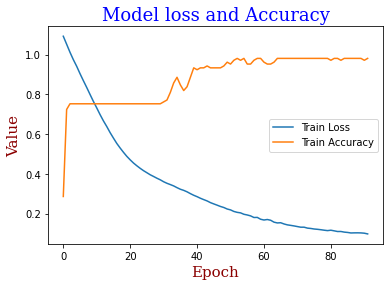

In [ ]:
font_title = {'family':'serif','color':'blue','size':18}
font_sub = {'family':'serif','color':'darkred','size':15}

plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.title('Model loss and Accuracy', fontdict=font_title)
plt.ylabel('Value', fontdict=font_sub)
plt.xlabel('Epoch', fontdict=font_sub)
plt.legend(loc='center right')
plt.show()

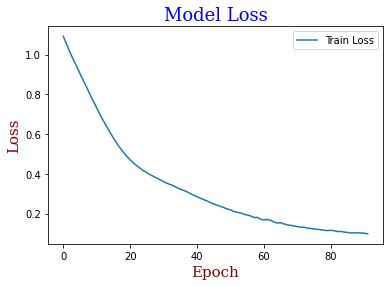

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model Loss', fontdict=font_title)
plt.ylabel('Loss', fontdict=font_sub)
plt.xlabel('Epoch', fontdict=font_sub)
plt.legend(['Train Loss'], loc='best')
plt.show()

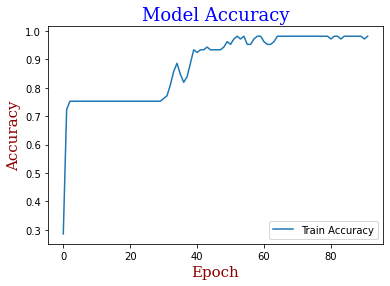

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy', fontdict=font_title)
plt.ylabel('Accuracy', fontdict=font_sub)
plt.xlabel('Epoch', fontdict=font_sub)
plt.legend(['Train Accuracy'], loc='lower right')
plt.show()